In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv('C:/Users/ShaileshBakshi/Documents/Datasets/Advertising.csv')


In [26]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [27]:
df.shape

(200, 5)

In [28]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [30]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [31]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

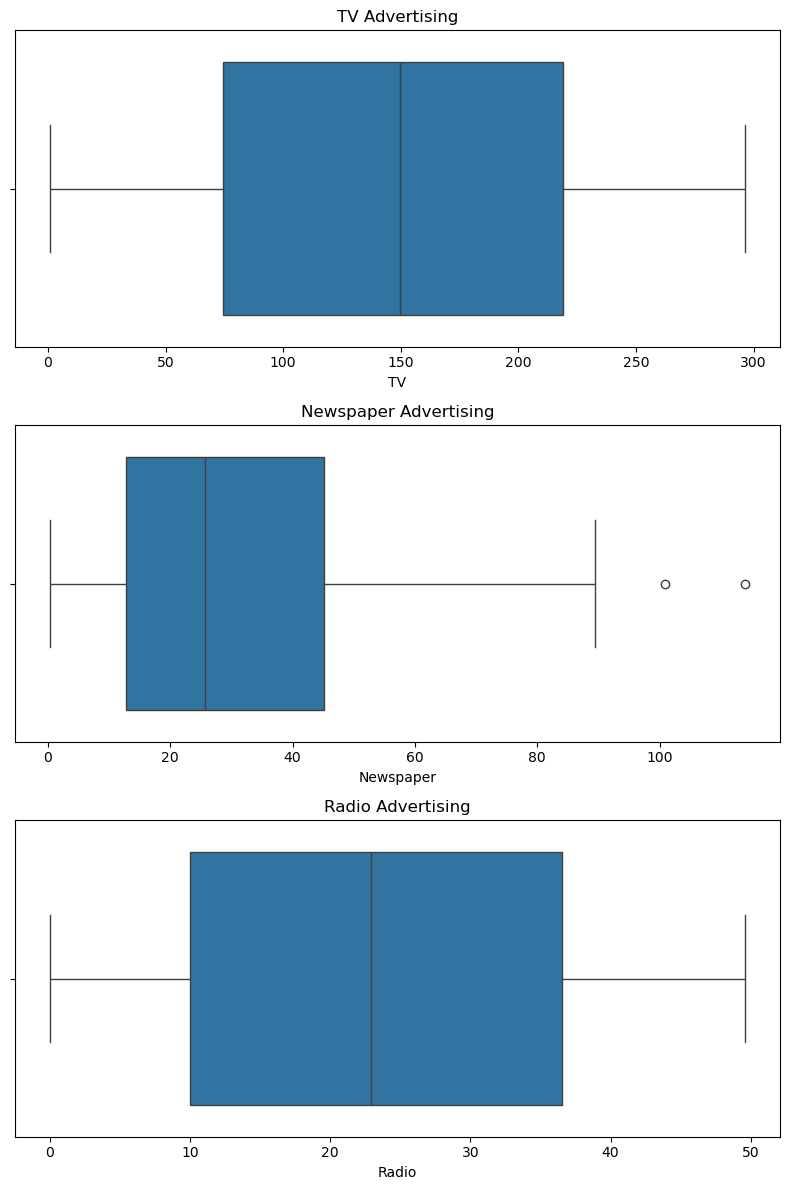

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
sns.boxplot(data=df, x='TV', ax=axs[0])
axs[0].set_title('TV Advertising')
sns.boxplot(data=df, x='Newspaper', ax=axs[1])
axs[1].set_title('Newspaper Advertising')
sns.boxplot(data=df, x='Radio', ax=axs[2])
axs[2].set_title('Radio Advertising')
plt.tight_layout()
plt.show()



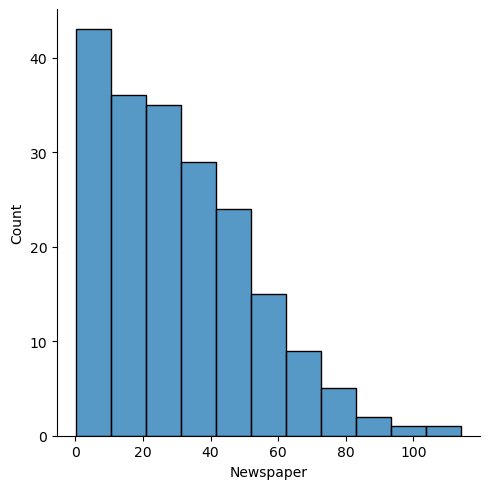

In [37]:
sns.displot(df['Newspaper'])

In [38]:
iqr=df.Newspaper.quantile(0.75)-df.Newspaper.quantile(0.25)

In [39]:
lower_bridge=df['Newspaper'].quantile(0.25)-(iqr*1.5)
upper_bridge=df['Newspaper'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [40]:
data=df.copy()

In [41]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

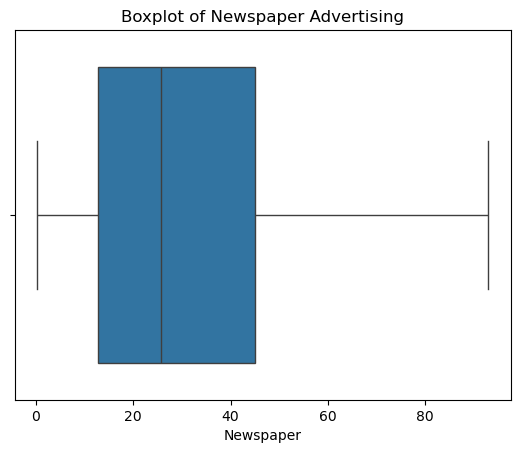

In [44]:
sns.boxplot(x=data['Newspaper'])  # 'y' for vertical boxplot
plt.title('Boxplot of Newspaper Advertising')
plt.show()

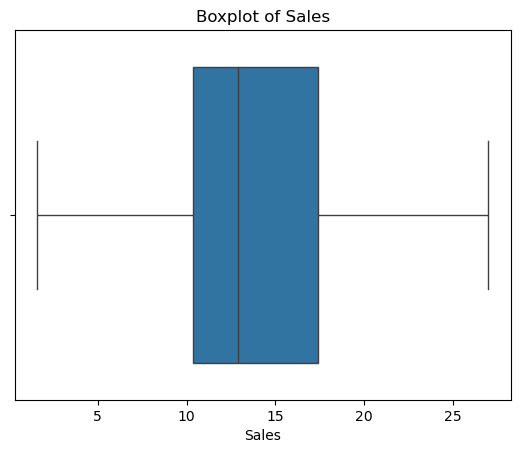

In [45]:
sns.boxplot(x=data['Sales'])
plt.title('Boxplot of Sales')
plt.show()

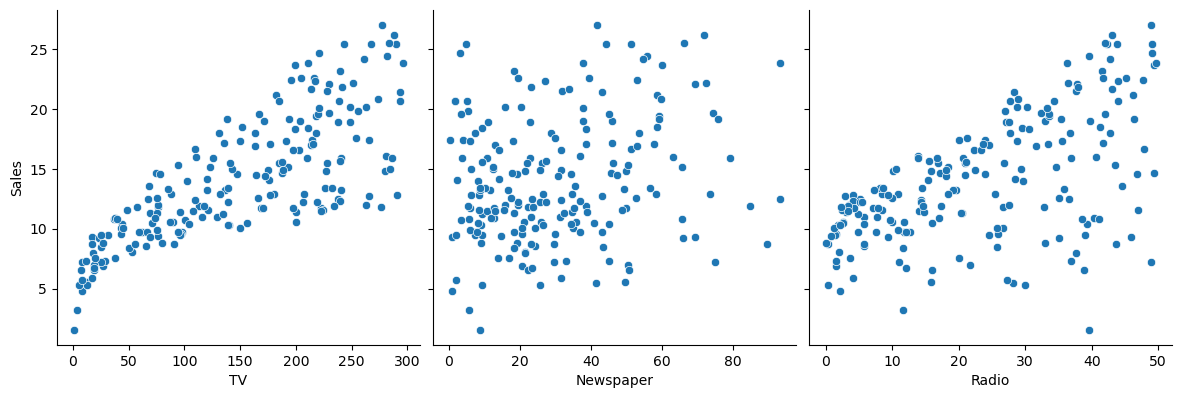

In [46]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
                  y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

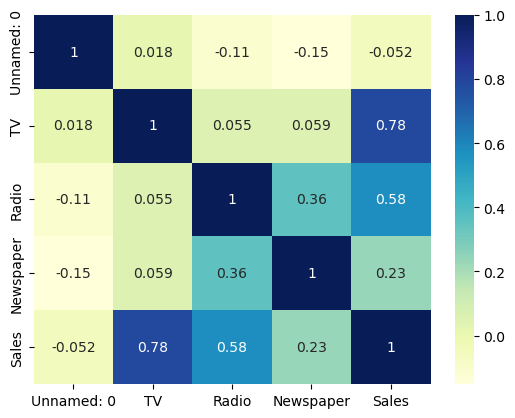

In [48]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [51]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales'] > 0.5) | (df.corr()['Sales'] < -0.5)].index)
print(important_features)

['TV', 'Radio', 'Sales']


In [52]:
x=data['TV']
y=data['Sales']

In [53]:
x=x.values.reshape(-1,1)

In [54]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [55]:
y


0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [56]:
print(x.shape,y.shape)

(200, 1) (200,)


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [58]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor().fit(x_train, y_train)
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)
print("Training predictions:", knn_train_pred)
print("Test predictions:", knn_test_pred)

Training predictions: [12.38 14.26 10.2   9.9  14.32  9.78 11.88 15.1  12.66 11.56 11.32 15.48
  5.9   5.42 11.56 13.8  11.6  20.2   7.18 15.16 21.4  17.54 13.6   8.64
 20.2   7.18 21.78  7.18 14.5   8.64 10.88 11.32 15.6  14.26 13.58 16.64
 13.52 17.54 15.28 19.9   7.38 13.04 12.16 16.26 11.56 15.66 10.86 17.54
  9.78 17.3   6.66 15.66 21.78 17.54 18.7  15.1  14.06  9.9  16.06 14.44
 15.9   9.98 16.32 14.44 20.14  9.98 10.42 16.06 15.48 16.06  7.38 17.46
 19.12 15.76 15.4  14.02 14.06  8.64 15.28 20.38 17.58  6.66  4.68 11.1
 17.3  17.46 20.14 19.9  16.06 17.46 18.7  16.06 13.4  16.28 16.52 10.2
 14.2  14.42 17.18 17.86 14.88 20.7  16.66 10.42 11.56  9.98 13.04 15.36
  8.26 10.66 20.78 17.86 13.7   5.42 10.18 17.6  15.28 17.54 21.34  8.26
 20.7   9.78 16.52 19.06 11.26 17.3  11.44 15.4  11.1  18.5  17.46 12.16
 15.92 14.6  14.4   7.38  9.9  11.38 14.2  15.28 10.2  18.9  10.2   4.68
 14.02 16.28 14.74 14.08 13.7  18.74  7.18 17.46 18.36 21.6  13.7   8.64
 16.66 18.36 15.28 20.7 ]
Test 

In [70]:
Results=pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [72]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor().fit(x_train, y_train)
knn_train_pred = knn.predict(x_train)  
knn_test_pred = knn.predict(x_test)   
r2 = r2_score(y_test, knn_test_pred)
r2_train = r2_score(y_train, knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))
variance = r2_train - r2
if 'Results' not in locals() or Results.empty:
    Results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Test RMSE", "Variance"])
new_result = pd.DataFrame([{"Model": "K-Nearest Neighbors", "Train R2": r2_train, "Test R2": r2, "Test RMSE": rmse, "Variance": variance}])
new_result = new_result.dropna(axis=1, how='all')
Results = pd.concat([Results, new_result], ignore_index=True)
print("R2:", r2)
print("RMSE:", rmse)
print(Results)
print("Training predictions:", knn_train_pred)
print("Test predictions:", knn_test_pred)


R2: 0.6954624344700926
RMSE: 3.10037094554829
                 Model  Train R2   Test R2  Test RMSE  Variance
0  K-Nearest Neighbors  0.645562  0.695462   3.100371   -0.0499
1  K-Nearest Neighbors  0.645562  0.695462   3.100371   -0.0499
Training predictions: [12.38 14.26 10.2   9.9  14.32  9.78 11.88 15.1  12.66 11.56 11.32 15.48
  5.9   5.42 11.56 13.8  11.6  20.2   7.18 15.16 21.4  17.54 13.6   8.64
 20.2   7.18 21.78  7.18 14.5   8.64 10.88 11.32 15.6  14.26 13.58 16.64
 13.52 17.54 15.28 19.9   7.38 13.04 12.16 16.26 11.56 15.66 10.86 17.54
  9.78 17.3   6.66 15.66 21.78 17.54 18.7  15.1  14.06  9.9  16.06 14.44
 15.9   9.98 16.32 14.44 20.14  9.98 10.42 16.06 15.48 16.06  7.38 17.46
 19.12 15.76 15.4  14.02 14.06  8.64 15.28 20.38 17.58  6.66  4.68 11.1
 17.3  17.46 20.14 19.9  16.06 17.46 18.7  16.06 13.4  16.28 16.52 10.2
 14.2  14.42 17.18 17.86 14.88 20.7  16.66 10.42 11.56  9.98 13.04 15.36
  8.26 10.66 20.78 17.86 13.7   5.42 10.18 17.6  15.28 17.54 21.34  8.26
 20.7   9.78

In [77]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
x = df[['TV', 'Radio', 'Newspaper']]  
y = df['Sales'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
svr = SVR(kernel='linear') 
svr.fit(x_train, y_train)
svr_train_pred = svr.predict(x_train)  
svr_test_pred = svr.predict(x_test)   
r2 = r2_score(y_test, svr_test_pred) 
r2_train = r2_score(y_train, svr_train_pred) 
rmse = np.sqrt(mean_squared_error(y_test, svr_test_pred))  
variance = r2_train - r2 
if 'Results' not in locals() or Results.empty:
    Results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Test RMSE", "Variance"])
new_result = pd.DataFrame([{
    "Model": "Support Vector Machine",
    "Train R2": r2_train,
    "Test R2": r2,
    "Test RMSE": rmse,
    "Variance": variance
}])
Results = pd.concat([Results, new_result], ignore_index=True)
print("Test R2:", r2)
print("Train R2:", r2_train)
print("Test RMSE:", rmse)
print("Variance:", variance)
print(Results)



Test R2: 0.8858361944219502
Train R2: 0.8897253562876458
Test RMSE: 1.8982676260789864
Variance: 0.003889161865695656
                    Model  Train R2   Test R2  Test RMSE  Variance
0     K-Nearest Neighbors  0.645562  0.695462   3.100371 -0.049900
1     K-Nearest Neighbors  0.645562  0.695462   3.100371 -0.049900
2  Support Vector Machine  0.889725  0.885836   1.898268  0.003889


In [78]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.645562,0.695462,3.100371,-0.049900
1,K-Nearest Neighbors,0.645562,0.695462,3.100371,-0.049900
2,Support Vector Machine,0.889725,0.885836,1.898268,0.003889


In [79]:
import statsmodels.api as sm

In [80]:
x_train_constant=sm.add_constant(x_train)

In [82]:
model=sm.OLS(y_train,x_train_constant).fit()

In [83]:
model.params

const        2.979067
TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64

In [84]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           2.53e-76
Time:                        21:18:26   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9791      0.354      8.427      0.0

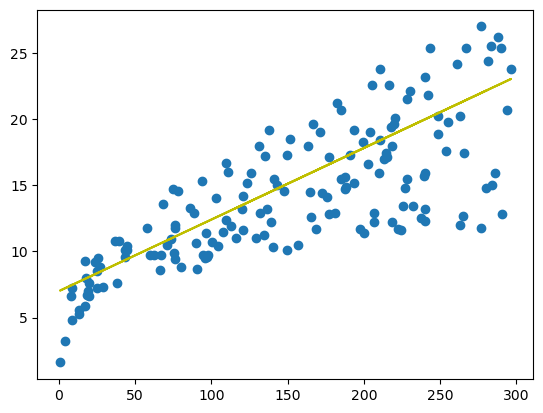

In [86]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x_train.iloc[:, 0], y_train)  
plt.plot(x_train.iloc[:, 0], 6.9955 + 0.0541 * x_train.iloc[:, 0], 'y')  
plt.show()

In [88]:
y_train_pred=model.predict(x_train_constant)
res=(y_train-y_train_pred)
res

79     1.311725
197    0.126623
38     0.044667
24     1.499898
122   -1.895621
         ...   
106    0.939544
14     0.540110
92     0.182377
179    0.273178
102   -2.682236
Length: 160, dtype: float64

<Figure size 640x480 with 0 Axes>

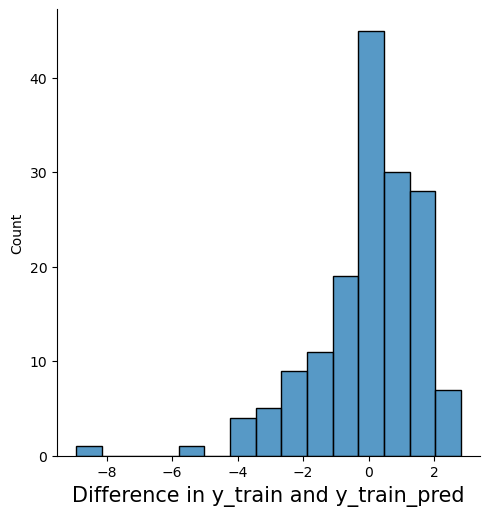

In [90]:
fig=plt.figure()
sns.displot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize=15)
plt.show()